In [18]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib
import astropy.units as u
import astropy.coordinates as coord
from astroquery.vizier import Vizier
%matplotlib inline
from astropy.io import fits
from astroquery.simbad import Simbad
import matplotlib
import aplpy
from astroquery.sdss import SDSS
from astroquery.skyview import SkyView
from astropy.coordinates import Angle
from astropy.table import Table
import time

In [19]:
#Region of Sky:

RA=240.0
DE=12.0
Radius=3

#Catalogues:

First_Catalogue_Name='GLEAM'
Second_Catalogue_Name='TGSS'

In [20]:
#Name of Flux in Catalogue

First_Flux='Fint151'
Second_Flux='Stotal'

#And their error
First_Flux_error='e_'+First_Flux
Second_Flux_error='e_'+Second_Flux

In [21]:
# First_Catalogue_Data= Table.read(First_Catalogue_Name+'.fit', format='fits')
# #print First_Catalogue_Data

# Second_Catalogue_Data= Table.read(Second_Catalogue_Name+'.fit', format='fits')
# #print Second_Catalogue_Data

# CV_Data= Table.read('Downes.fit', format='fits')
# #print CV_Data

In [22]:
# start_time = time.time()
# #Getting data from first catalogue

# Vizier.ROW_LIMIT = -1
# First_Catalog_List = Vizier.find_catalogs(First_Catalogue_Name)
# First_Catalogs = Vizier.get_catalogs(First_Catalog_List.keys())
# First_Catalogue_Data=First_Catalogs[0]


# #Getting data from second catalogue

# Second_Catalog_List = Vizier.find_catalogs(Second_Catalogue_Name)
# Second_Catalogs = Vizier.get_catalogs(Second_Catalog_List.keys())
# Second_Catalogue_Data=Second_Catalogs['J/A+A/598/A78/table3']

# #Getting CV data

# CV_Catalog_List = Vizier.find_catalogs('Downes+ 2001-2006')
# CV_Catalogs = Vizier.get_catalogs(CV_Catalog_List.keys())
# CV_Catalogue_Data=Second_Catalogs[0]
# print("--- %s seconds ---" % (time.time() - start_time))

In [23]:
#Making array for first catalogue in region of the sky chosen 

n=0
RA_First=[]
DE_First=[]
Lum_First=[]
RA_First_e=[]
DE_First_e=[]
Lum_First_e=[]
while n< len(First_Catalogue_Data):
    if RA-Radius<First_Catalogue_Data["_RAJ2000"][n] and First_Catalogue_Data["_RAJ2000"][n]<RA+Radius and DE-Radius<First_Catalogue_Data["_DEJ2000"][n] and First_Catalogue_Data["_DEJ2000"][n]<DE+Radius:
        RA_First.append(First_Catalogue_Data["_RAJ2000"][n])
        DE_First.append(First_Catalogue_Data["_DEJ2000"][n])
        Lum_First.append(First_Catalogue_Data[First_Flux][n])
        RA_First_e.append(First_Catalogue_Data["e_RAJ2000"][n])
        DE_First_e.append(First_Catalogue_Data["e_DEJ2000"][n])
        Lum_First_e.append(First_Catalogue_Data[First_Flux_error][n])
    n=n+1

#Making array for second catalogue in region of the sky chosen 
    
n=0
RA_Second=[]
DE_Second=[]
Lum_Second=[]
RA_Second_e=[]
DE_Second_e=[]
Lum_Second_e=[]
while n< len(Second_Catalogue_Data):
    if RA-Radius<Second_Catalogue_Data["_RAJ2000"][n] and Second_Catalogue_Data["_RAJ2000"][n]<RA+Radius and DE-Radius<Second_Catalogue_Data["_DEJ2000"][n] and Second_Catalogue_Data["_DEJ2000"][n]<DE+Radius:
        RA_Second.append(Second_Catalogue_Data["_RAJ2000"][n])
        DE_Second.append(Second_Catalogue_Data["_DEJ2000"][n])
        Lum_Second.append(Second_Catalogue_Data[Second_Flux][n]/1000)
        RA_Second_e.append(Second_Catalogue_Data["e_RAJ2000"][n]/3600)
        DE_Second_e.append(Second_Catalogue_Data["e_DEJ2000"][n]/3600)
        Lum_Second_e.append(Second_Catalogue_Data[Second_Flux_error][n]/1000)
    n=n+1

#Making array for CV catalogue in region of the sky chosen 
    
n=0
RA_CV=[]
DE_CV=[]
while n< len(CV_Data):
    if RA-Radius<CV_Data["_RAJ2000"][n] and CV_Data["_RAJ2000"][n]<RA+Radius and DE-Radius<CV_Data["_DEJ2000"][n] and CV_Data["_DEJ2000"][n]<DE+Radius:
        RA_CV.append(CV_Data["_RAJ2000"][n])
        DE_CV.append(CV_Data["_DEJ2000"][n])
    n=n+1

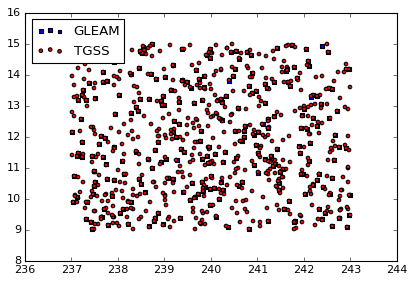

In [24]:
#Plotting coords of two arrays to compare

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(RA_First, DE_First, s=10, c='b', marker="s", label=First_Catalogue_Name)
ax1.scatter(RA_Second,DE_Second, s=10, c='r', marker="o", label=Second_Catalogue_Name)
plt.legend(loc='upper left');
plt.show()

In [25]:
#This loop finds common stars between catalogues:

#Creating new arrays:

#Luminosities of stars in common(and error)
Lum_First_Relevant=[]
Lum_Second_Relevant=[]
Lum_First_Relevant_e=[]
Lum_Second_Relevant_e=[]

#Coordinates of stars in common(and error)
RA_First_Relevant=[]
RA_Second_Relevant=[]
DE_First_Relevant=[]
DE_Second_Relevant=[]
RA_First_Relevant_e=[]
RA_Second_Relevant_e=[]
DE_First_Relevant_e=[]
DE_Second_Relevant_e=[]

#Creating new variables

#index for first catalogue:
f=0
#index for second catalogue:
s=0
#number of iterations:
n=0
#Number of stars in both catalogues
corr=1

#While loop goes through all of first catalogue..
while f<len(RA_First):
    #If it compares a source in first catalogue to every source in second without finding one in common then..
    if s==len(RA_Second):
        #It moves on to next source in first and..
        f=f+1
        #Starts comparing it to the first source in the second catalogue
        s=0
    #This is a formula for overlapping circles with the radii being the error
    #If this is true catalogues have that star in common
    elif RA_First_e[f]+RA_Second_e[s]>= abs(RA_First[f]-RA_Second[s]) and DE_First_e[f]+DE_Second_e[s]>= abs(DE_First[f]-DE_Second[s]):
        #print coords and luminosity
        '''print corr,":"
        print First_Catalogue_Name," Coords: (",RA_First[f],",",DE_First[f],")"
        print First_Catalogue_Name," error: (",RA_First_e[f],",",DE_First_e[f],")"
        print Second_Catalogue_Name," Coords: (",RA_Second[s],",",DE_Second[s],")"
        print Second_Catalogue_Name," error: (",RA_Second_e[s],",",DE_Second_e[s],")"
        print First_Catalogue_Name," Flux:",Lum_First[f]*.001
        print Second_Catalogue_Name," Flux:",Lum_Second[s]*.001
        print ""'''
        #Making arrays of flux of sources in common (and error)
        Lum_First_Relevant.append((Lum_First[f]))
        Lum_Second_Relevant.append(Lum_Second[s])
        Lum_First_Relevant_e.append((Lum_First_e[f]))
        Lum_Second_Relevant_e.append(Lum_Second_e[s])
        
        #Making arrays of coordinates of sources in common 
        RA_First_Relevant.append(RA_First[f])
        RA_Second_Relevant.append(RA_Second[s])
        RA_First_Relevant_e.append(RA_First_e[f])
        RA_Second_Relevant_e.append(RA_Second_e[s])
        DE_First_Relevant.append(DE_First[f])
        DE_Second_Relevant.append(DE_Second[s])
        DE_First_Relevant_e.append(DE_First_e[f])
        DE_Second_Relevant_e.append(DE_Second_e[s])
        
        #Number of common sources increased
        corr=corr+1
        #Move onto next source in first catalogue
        f=f+1
        #Starts comparing it to the first source in the second catalogue
        s=0
    #If neither of these are true then..
    else:
        #Try next source in second catalogue
        s=s+1
    #Before going onto next loop increase number of iterations
    n=n+1
 

In [26]:
print "Number of iterations:",n
print "Number of stars corrolated:",corr

Number of iterations: 132950
Number of stars corrolated: 122


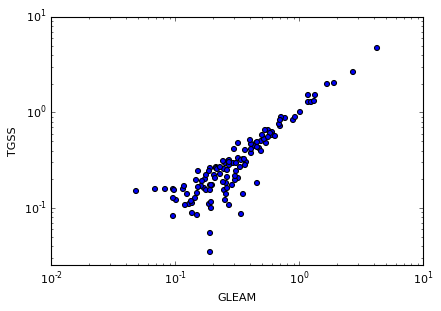

In [27]:
#Plotting Luminosities (unit Jy, log scale)

if corr>0:
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(Lum_First_Relevant, Lum_Second_Relevant)
    plt.xlabel(First_Catalogue_Name)
    plt.ylabel(Second_Catalogue_Name)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0.01,10)
    plt.ylim(0,10)
    plt.show()

In [28]:
#This finds source with biggest fractional change

#Defining new variables
Fractional_Diff=0
n=0
Current_Max_Diff=0
Max_Diff_Index=0
m=0

#This loop goes through the whole lists of common stars
while n<corr-1:
    #Calculates nth fractional change
    Fractional_Diff=(abs(Lum_First_Relevant[n]-Lum_Second_Relevant[n]))/Lum_First_Relevant[n]
    #If the fractional change is larger than the combined error (i.e is relevant) then..
    if abs(Lum_First_Relevant[n]-Lum_Second_Relevant[n])>Lum_First_Relevant_e[n]+Lum_Second_Relevant_e[n]:
        #..if this fractional change is greater than the biggest change found before it then..
        if Fractional_Diff>Current_Max_Diff:
            #This is the biggest fractional change
            Max_Diff_Index=n
            Current_Max_Diff=Fractional_Diff
        else:
            m=m+1
    n=n+1
if m==n:
    print "no result"
else:
    print Lum_First_Relevant[Max_Diff_Index],Lum_Second_Relevant[Max_Diff_Index]
#When loop is finished it will have found the biggest change in the list

0.048303 0.1509


In [29]:
print "Coordinates of source with largest change"
print RA_First_Relevant[Max_Diff_Index],DE_First_Relevant[Max_Diff_Index]
print "CV data:"
n=0
while n<len(RA_CV):
    print RA_CV[n],DE_CV[n]
    n=n+1

Coordinates of source with largest change
238.28566 12.7667711111
CV data:
238.234166667 12.9131111111
240.298054137 9.28685543111


In [32]:
#Checking if correlated sources are in CV catalogue:

#Set CV error:
RA_CV_e=.5#10.0/3600.0
DE_CV_e=.5#10.0/3600.0

#New variables for comparing:
c=0
f=0


#While loop goes through all of CV catalogue and compares them in similar way to previous loop
while c<len(RA_CV):
    if f==len(RA_First_Relevant):
        c=c+1
        f=0
    elif RA_First_Relevant_e[f]+RA_CV_e>= abs(RA_First_Relevant[f]-RA_CV[c]) and DE_First_Relevant_e[f]+DE_CV_e>= abs(DE_First_Relevant[f]-DE_CV[c]):
        print "CV:",RA_CV[c],DE_CV[c]
        print "Correlated Source:",RA_First_Relevant[f],DE_First_Relevant[f]
        print "Change in Luminosity:",Lum_First_Relevant[f],Lum_Second[f]
        print ""
        c=c+1
        f=0
    else:
        #Try next source in second catalogue
        f=f+1

CV: 238.234166667 12.9131111111
Correlated Source: 237.938675 12.7234888889
Change in Luminosity: 1.244772 0.048

CV: 240.298054137 9.28685543111
Correlated Source: 239.983138889 9.78688111111
Change in Luminosity: 0.171105 0.0259



In [31]:
#This displays image of a correlated source


#Which source to show:
x=Max_Diff_Index

#Coordinates of this star:
pos=coord.SkyCoord(RA_Second_Relevant[x]*u.deg, DE_Second_Relevant[x]*u.deg)
#pos='Eta Carinae'
ra=np.array([RA_Second_Relevant[x]])
de=np.array([DE_Second_Relevant[x]])

#Find image from DSS:
images = SkyView.get_images(pos,survey=['DSS'])
print images[0]

CV = aplpy.FITSFigure(images[0])


#Gives in grid and makes it grayscale (can also be made colorscale)
CV.show_grayscale()
CV.add_grid()

#This plots a circle where the relevant source should be 
x_pix, y_pix = CV.world2pixel(ra,de)
plt.scatter(x_pix, y_pix, s=100, c='red', alpha=.5)
plt.show()

TypeError: 'NoneType' object has no attribute '__getitem__'